<a href="https://colab.research.google.com/github/Derrick-Majani/Finance_Risk_Analytics/blob/main/CreditCard(Logistic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Default Data

### Description:
The dataset contains information on default payments, demographics, credit data, history of payment, and bill statements of credit card clients.

### Usage
Default

### Format
A data frame with 10000 observations on the following 25 variables

***ID***: ID of each client

***LIMIT_BAL***: Amount of given credit in INR (includes individual and family/supplementary credit

***FICO***: Bureau Scor/Credit Score (Ranges from 300 to 900)

***EDUCATION***: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

***MARRIAGE***: Marital status (1=married, 2=single, 3=others)

***AGE***: Age in years

***SEX***: Male/Female

***PAY_1***: Repayment status in March, 2019 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 
8=payment delay for eight months, 9=payment delay for nine months and above)

***PAY_2***: Repayment status in February, 2019 (scale same as above)

***PAY_3***: Repayment status in January, 2019 (scale same as above)

***BILL_AMT4***: Amount of bill statement in December, 2018 (INR)

***BILL_AMT5***: Amount of bill statement in November, 2018 (INR)

***BILL_AMT6***: Amount of bill statement in October, 2018 (INR)

***PAY_AMT4***: Amount of previous payment in December, 2018 (INR)

***PAY_AMT5***: Amount of previous payment in November, 2018 (INR)

***PAY_AMT6***: Amount of previous payment in October, 2018 (INR)

***default***: Default payment in next month (1=yes, 0=no)



## Importing Libraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Libraries to help with data visualization

import seaborn as sns

## Load the Data

In [2]:
from google.colab import files
import pandas as pd
# Upload the CSV file from your local machine to Google Colab
uploaded = files.upload()



Saving CreditCardDefault.csv to CreditCardDefault.csv


In [4]:
Default = pd.read_csv("CreditCardDefault.csv")
Default.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,Pay%1,Pay%2,Pay%3,default,FICO
0,4,50000.0,2,2,1,37,28314.0,28959,29547,1111.0,1169.0,1111,0.04,0.04,0.04,0,MT700
1,15,250000.0,1,1,2,29,59696.0,56875,55512,3111.0,3111.0,3111,0.05,0.05,0.06,0,MT700
2,17,20000.0,1,1,2,24,18338.0,17915,19114,1.0,1651.0,1,0.00,0.09,0.00,1,LT500
3,18,320000.0,1,1,1,49,71174.0,5856,195599,21111.0,195599.0,51111,0.30,33.40,0.26,0,MT700
4,21,130000.0,2,3,2,39,21616.0,11812,931,2111.0,931.0,33764,0.10,0.08,36.27,0,MT700


In [5]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         4246 non-null   int64  
 1   LIMIT_BAL  4246 non-null   float64
 2   SEX        4246 non-null   int64  
 3   EDUCATION  4246 non-null   int64  
 4   MARRIAGE   4246 non-null   int64  
 5   AGE        4246 non-null   int64  
 6   BILL_AMT4  4246 non-null   float64
 7   BILL_AMT5  4246 non-null   int64  
 8   BILL_AMT6  4246 non-null   int64  
 9   PAY_AMT4   4246 non-null   float64
 10  PAY_AMT5   4246 non-null   float64
 11  PAY_AMT6   4246 non-null   int64  
 12  Pay%1      4246 non-null   float64
 13  Pay%2      4246 non-null   float64
 14  Pay%3      4246 non-null   float64
 15  default    4246 non-null   int64  
 16  FICO       4246 non-null   object 
dtypes: float64(7), int64(9), object(1)
memory usage: 564.0+ KB


In [6]:
Default.shape

(4246, 17)

In [7]:
Default.duplicated().sum()

0

In [8]:
Default.drop('ID', axis = 1, inplace = True)

## Statistical Summary

In [9]:
# Convert integer columns to object type
Default['SEX'] = Default['SEX'].astype('object')
Default['EDUCATION'] = Default['EDUCATION'].astype('object')
Default['MARRIAGE'] = Default['MARRIAGE'].astype('object')

In [10]:
# Print numerical summary
print('Numerical Summary:')
Default.describe().T


Numerical Summary:


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,4246.0,157117.286858,130528.792785,10000.0,50000.00,120000.00,230000.00,1000000.00
AGE,4246.0,35.047574,9.110943,21.0,28.00,33.00,41.00,73.00
BILL_AMT4,4246.0,57061.098917,68727.390542,511.0,13726.50,31130.50,74406.75,891586.00
BILL_AMT5,4246.0,53771.845973,64368.227196,511.0,12985.00,28922.50,71826.50,927171.00
BILL_AMT6,4246.0,51647.689590,62985.909815,511.0,11514.75,28138.00,68806.50,961664.00
PAY_AMT4,4246.0,5616.298398,14647.382789,1.0,1111.00,2136.00,5111.00,321118.00
PAY_AMT5,4246.0,5193.867640,14114.021638,1.0,1111.00,2111.00,5111.00,417991.00
PAY_AMT6,4246.0,5717.024494,16549.440680,1.0,911.00,2111.00,5111.00,261111.00
Pay%1,4246.0,0.566373,3.454705,0.0,0.03,0.04,0.12,106.56
Pay%2,4246.0,0.549659,3.953106,0.0,0.04,0.05,0.14,129.65


In [11]:
# Print categorical summary
print('Categorical Summary:')
Default.describe(include=['object']).T

Categorical Summary:


,count,unique,top,freq
SEX,4246,2,2,2530
EDUCATION,4246,3,2,2109
MARRIAGE,4246,4,2,2324
FICO,4246,2,MT700,3037


In [13]:
Default["MARRIAGE"].value_counts()

2    2324
1    1861
3      58
0       3
Name: MARRIAGE, dtype: int64

In [18]:
Default["default"].value_counts()

0    3282
1     964
Name: default, dtype: int64

## Correlation Analysis

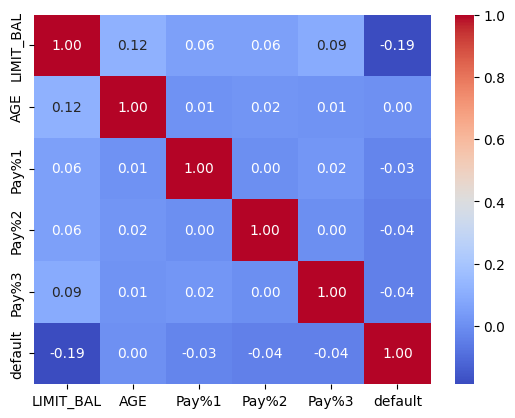

In [28]:
# Select only numerical columns
num_cols = Default.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
corr_matrix = num_cols.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()

## Missing Values

           Total  Percent
LIMIT_BAL      0      0.0
SEX            0      0.0
EDUCATION      0      0.0
MARRIAGE       0      0.0
AGE            0      0.0
BILL_AMT4      0      0.0
BILL_AMT5      0      0.0
BILL_AMT6      0      0.0
PAY_AMT4       0      0.0
PAY_AMT5       0      0.0
PAY_AMT6       0      0.0
Pay%1          0      0.0
Pay%2          0      0.0
Pay%3          0      0.0
default        0      0.0
FICO           0      0.0


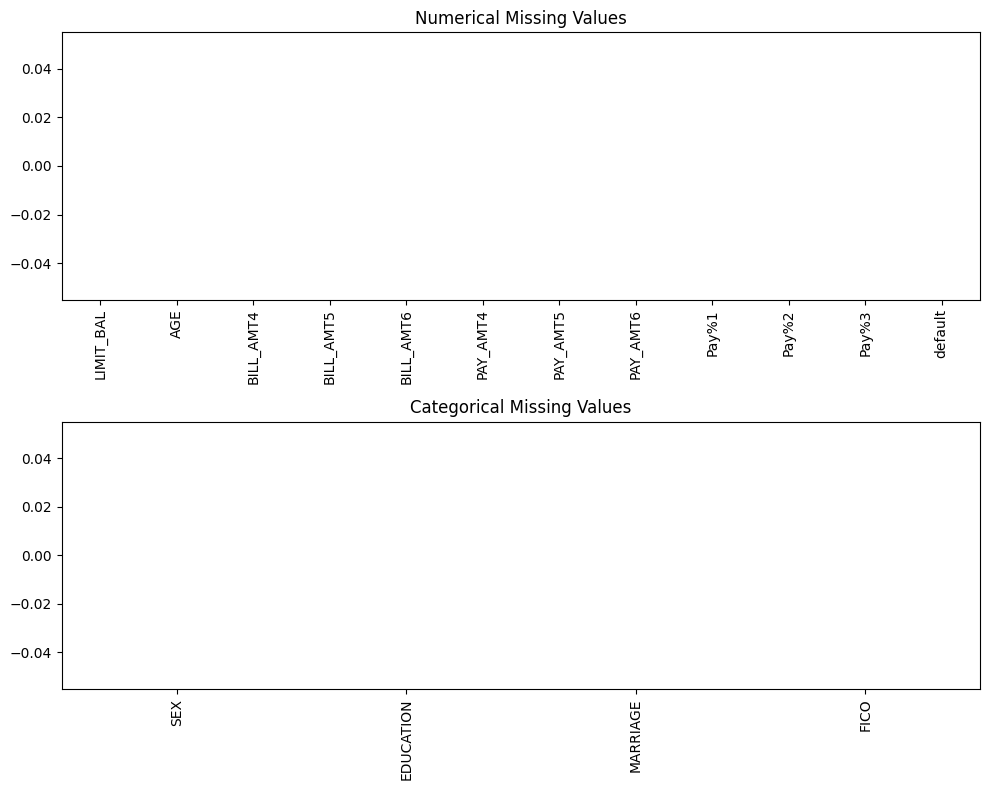

,Total,Percent
LIMIT_BAL,0,0.0
SEX,0,0.0
EDUCATION,0,0.0
MARRIAGE,0,0.0
AGE,0,0.0
BILL_AMT4,0,0.0
BILL_AMT5,0,0.0
BILL_AMT6,0,0.0
PAY_AMT4,0,0.0
PAY_AMT5,0,0.0


In [12]:
def missing_check(Default):
    total = Default.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (Default.isnull().sum()/Default.isnull().count()*100).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    print(missing_data)
    
    # plot missing values for numerical and categorical variables
    fig, axes = plt.subplots(nrows=2, figsize=(10,8))
    num_missing = Default.select_dtypes(include=['int64', 'float64']).isnull().sum().sort_values(ascending=False)
    num_missing.plot(kind='bar', ax=axes[0])
    axes[0].set_title('Numerical Missing Values')
    cat_missing = Default.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    cat_missing.plot(kind='bar', ax=axes[1])
    axes[1].set_title('Categorical Missing Values')
    plt.tight_layout()
    plt.show()
    
    return missing_data # return the dataframe

missing_check(Default)


In [14]:
#Since we already have Payment to Bill ratio variables, we can eliminate the Payment and Bill Amounts
Default = Default.drop(['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis = 1)

In [15]:
Default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Pay%1,Pay%2,Pay%3,default,FICO
0,50000.0,2,2,1,37,0.04,0.04,0.04,0,MT700
1,250000.0,1,1,2,29,0.05,0.05,0.06,0,MT700
2,20000.0,1,1,2,24,0.00,0.09,0.00,1,LT500
3,320000.0,1,1,1,49,0.30,33.40,0.26,0,MT700
4,130000.0,2,3,2,39,0.10,0.08,36.27,0,MT700


In [16]:
# Define X and Y variables
X = Default.drop(["default"], axis=1) # independent variables
y = Default['default'] # dependent variable

## Create Dummies(One Hot Encoding)

In [17]:
# iterate over the categorical columns and apply one-hot encoding
for col in X.select_dtypes(include=['object']):
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col)], axis=1)

# print the encoded DataFrame
X.head()

<ipython-input-17-9154a1b08c98>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col)], axis=1)
<ipython-input-17-9154a1b08c98>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col)], axis=1)
<ipython-input-17-9154a1b08c98>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col)], axis=1)


,LIMIT_BAL,AGE,Pay%1,Pay%2,Pay%3,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,FICO_LT500,FICO_MT700
0,50000.0,37,0.04,0.04,0.04,0,1,0,1,0,0,1,0,0,0,1
1,250000.0,29,0.05,0.05,0.06,1,0,1,0,0,0,0,1,0,0,1
2,20000.0,24,0.00,0.09,0.00,1,0,1,0,0,0,0,1,0,1,0
3,320000.0,49,0.30,33.40,0.26,1,0,1,0,0,0,1,0,0,0,1
4,130000.0,39,0.10,0.08,36.27,0,1,0,0,1,0,0,1,0,0,1


In [19]:
X.shape

(4246, 16)

## Train and split the data

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3396, 16)
Testing set shape: (850, 16)


## Prediction on Training Data

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define logistic regression model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict on the training data
y_pred_train = lr.predict(X_train)

# Print accuracy score and classification report
print("Accuracy on training data:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


Accuracy on training data: 0.7735571260306242
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2627
           1       0.00      0.00      0.00       769

    accuracy                           0.77      3396
   macro avg       0.39      0.50      0.44      3396
weighted avg       0.60      0.77      0.67      3396



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Prediction on test data

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define logistic regression model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict on the testing data
y_pred = lr.predict(X_test)

# Print accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7705882352941177
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       655
           1       0.00      0.00      0.00       195

    accuracy                           0.77       850
   macro avg       0.39      0.50      0.44       850
weighted avg       0.59      0.77      0.67       850



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Summary

In [22]:
import statsmodels.api as sm


# Add constant term to X for intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define logistic regression model
lr = sm.Logit(y_train, X_train)

# Fit the model
results = lr.fit()

# Print the summary of the model
print(results.summary())

# Print the results
print("Intercept:", results.params[0])
print("Coefficients:", results.params[1:])
print("Odds ratios:", np.exp(results.params[1:]))


         Current function value: 0.140628
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 3396
Model:                          Logit   Df Residuals:                     3382
Method:                           MLE   Df Model:                           13
Date:                Tue, 02 May 2023   Pseudo R-squ.:                  0.7371
Time:                        17:07:36   Log-Likelihood:                -477.57
converged:                      False   LL-Null:                       -1816.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.9529   5.81e+06   -1.2e-06      1.000   -1.14e+07    1.14e+07
LIMIT_BAL   -2.428e-06    7.2e-07     -3.371      0.001   -3.8

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


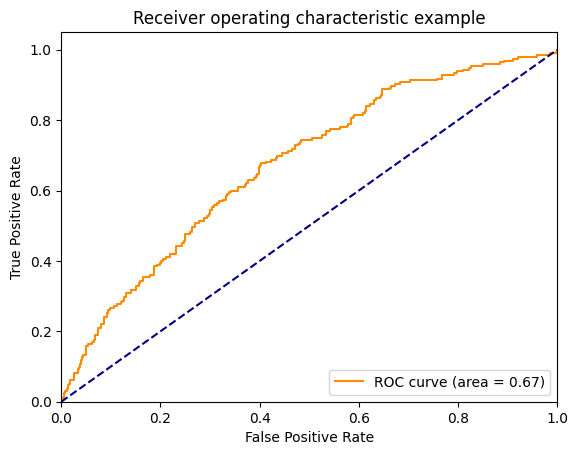

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define logistic regression model
lr = LogisticRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict probabilities for the test data
y_prob = lr.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve and AUC score
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In logistic regression, an ROC (receiver operating characteristic) curve is a graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for different classification thresholds. The area under the ROC curve (AUC) is a measure of the classifier's ability to distinguish between positive and negative classes. 

A value of 0.5 for the AUC indicates that the classifier performs no better than random guessing, while a value of 1.0 indicates perfect classification. A value between 0.5 and 1.0 indicates that the classifier performs better than random guessing, but its effectiveness decreases as the AUC value approaches 0.5.

An AUC of 0.67 indicates that the classifier performs better than random guessing, but its performance is modest. It suggests that the model has some ability to distinguish between the two classes, but there is room for improvement. In other words, the model has some predictive power, but it may not be reliable enough to use in practical applications without further refinement or evaluation.